# Working with API in Python

In order to properly integrate an api into yout software, webservice, application, ... there is some best practices to follow.

## 1- Dedicated request class

In [1]:
# github_request.py
import requests

class GithubRequest:
    _base_url = "https://api.github.com"
        
    @classmethod
    def get_events(cls):
        return requests.get(cls._base_url+"/events")
        

In [2]:
# Usage
print(GithubRequest.get_events())

<Response [200]>


## 2- Dedicated response class

In [3]:
# Response.py

class Response:
    
    def __init__(self, status_code, content):
        self.status_code = status_code
        self.content = content

In [8]:
class Response2:
    def __init__(self, status_code, content):
        self.status_code = status_code
        self.content = content

In [4]:
#usage

response = Response(status_code=200, content={"event": "my awesome_event"})
print(response)

In [14]:
response2 = Response2(status_code=404, content={"event": "Page not found"})
print(response2.content)

{'event': 'Page not found'}


### Exercice :

Refactor the method "get_events" from "GithubRequest" in order to make them return a custom "Response" class

In [5]:
# github_request.py
import requests

class GithubRequest:
    _base_url = "https://api.github.com"
        
    @classmethod
    def get_events(cls):
        response =  requests.get(cls._base_url+"/events")
        
        return Response(status_code=response.status_code, content=response.json())


In [6]:
events = GithubRequest.get_events()

assert isinstance(events, Response)
assert not isinstance(events,requests.Response)
print("ok")

ok


## 3- Business class

In [10]:
# VersioningEvent.py

class VersioningEvent:
    
    def __init__(self, type, message, created_at):
        self.type = type
        self.message = message
        self.created_at = created_at

In [11]:
versioning_event = VersioningEvent("push", "Hello", "2021-05-06T07:07:42Z")
print(versioning_event)

# Facade pattern

When working with external ressources, it's important to decoupled services by their utilities

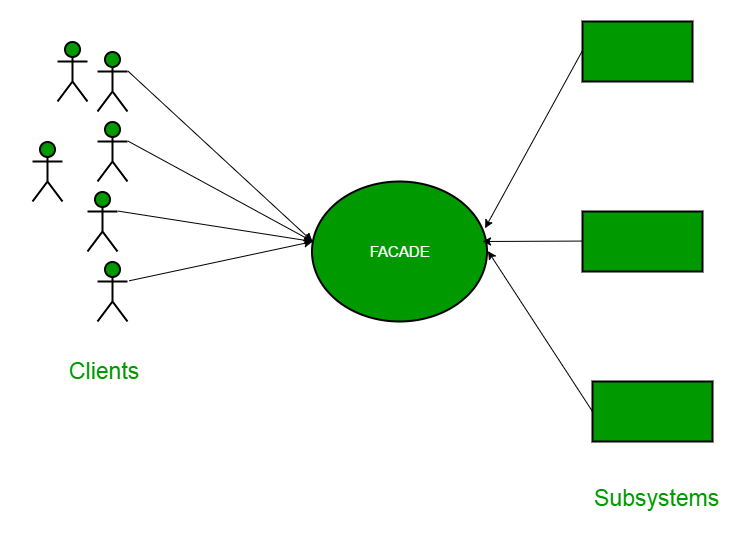

In [10]:
from IPython.core.display import Image
Image(filename='img/facadeA.png', retina=True)

Let's say that, for the purpose of our company, we want to monitor our versionning system.

We want to be able to fetch events from our versionning system, and use them inside of our services.

The facade will hide the complexity of the system, and will only expose what is need for business matters

### Exercice :

Write the facade code in order to make the "main.py" code working

In [33]:
#VersioningEventFacade.py

# 'id': '16435050220',
#     'type': 'CreateEvent',
#     'actor': {'id': 49699333,
#               'login': 'dependabot[bot]',
#               'display_login': 'dependabot',
#               'gravatar_id': '',
#               'url': 'https://api.github.com/users/dependabot[bot]',
#               'avatar_url': 'https://avatars.githubusercontent.com/u/49699333?'},
#     'repo': {'id': 202519285,
#              'name': 'missevia/rails-mister-cocktail',
#              'url': 'https://api.github.com/repos/missevia/rails-mister-cocktail'},
#     'payload': {'ref': 'dependabot/bundler/nokogiri-1.11.5',
#                 'ref_type': 'branch',
#                 'master_branch': 'master',
#                 'description': None,
#                 'pusher_type': 'user'},
#     'public': True,
#     'created_at': '2021-05-20T08:18:56Z'


# you can use the following attribute to math the VersioningEvent attributes:
# type -> type
# message -> payload
# created_at -> created_at

class VersioningEventFacade:
    import json
    _base_url = "https://api.github.com"
    
    def get_versioning_events() -> [VersioningEvent]:

        events =  GithubRequest.get_events().content
        
        versioning_event=[]
        for version in events:
            versioning_event.append( VersioningEvent(type=version["type"],message= version["payload"], created_at=version["created_at"]))
        return versioning_event 


In [34]:
# main.py

#from event_module.facade import VersioningEventFacade
#from event_module.model import VersioningEvent

versioning_events = VersioningEventFacade.get_versioning_events()

for versioning_event in versioning_events:
    assert isinstance(versioning_event, VersioningEvent)
    
print("ok")
# I cant now work with Python Objects

ok
